<a href="https://colab.research.google.com/github/khipucode/phd_data_and_codes/blob/main/4_4_3_heatmap_PM_MZM_analise_df_N_19_experimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tamanho de amostras do df 11024


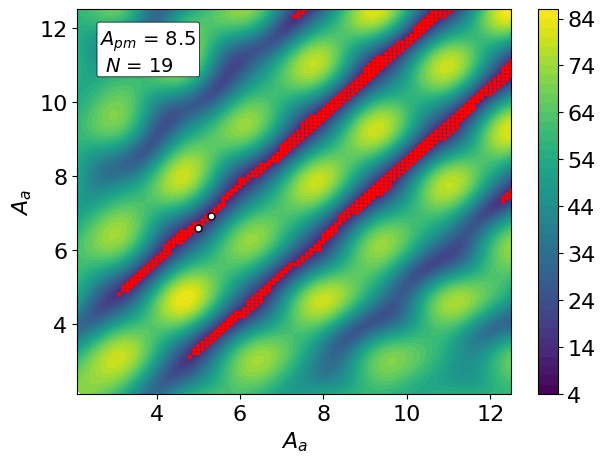

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator, AutoLocator, ScalarFormatter


# Valores específicos
Apm_value = 8.5
CV = 15  # Substitua 'valor_especifico_CV' limite superior FR
# Filtrar dados para o valor específico de Apm

# dados gerado para Apm = 1.9, Aa, Ab  = 5.5 a 17 quando N = 15 linhs foram comparadas
url_n15 = 'https://raw.githubusercontent.com/khipucode/phd_data_and_codes/main/dados/Data_3_3_2_all_values_PM_MZM_N_19_Apm_8.5_Ax_2.1_a_12.5.csv'

dfN15 = pd.read_csv(url_n15)
print('tamanho de amostras do df', len(dfN15))


# Configurações de estilo
tk_sz = 16  # Tamanho dos ticks nos eixos
ax_lb_sz = 16  # Tamanho das labels dos eixos
ann_tx_sz = 14  # Tamanho do texto da anotação
an_bg_cl = 'white'  # Cor de fundo da anotação
h_let = 16


# Dando nomenas colunas
dfN15.shape

#              nv,  iApm, iAa, iAb, CV,  AV, flat, CVmin, a1,a2,a3
dfN15.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K','L']
subset = dfN15[dfN15['B'] == Apm_value]

# Cria uma grade regular de pontos
c_unique = np.linspace(subset['C'].min(), subset['C'].max(), len(subset['C'].unique()))
d_unique = np.linspace(subset['D'].min(), subset['D'].max(), len(subset['D'].unique()))
c_grid, d_grid = np.meshgrid(c_unique, d_unique)

# Interpola os valores de 'E' para a grade criada
e_grid = griddata((subset['C'], subset['D']), subset['E'], (c_grid, d_grid), method='cubic')

# Cria o gráfico de contorno
plt.rcParams.update({'font.size': h_let})
plt.figure(figsize=(7, 5))
contour = plt.contourf(c_grid, d_grid, e_grid, levels=50, cmap='viridis')
plt.colorbar(contour)
#plt.title(f'Mapa de Calor para Apm = {Apm_value}')
plt.xlabel('$A_a$')
plt.ylabel('$A_a$')

# Filtrar pontos onde 'E' é menor que CV e plotá-los
low_e_points = subset[subset['E'] < CV]
#plt.scatter(low_e_points['C'], low_e_points['D'], color='red', label=f'E < {CV}')
#plt.scatter(low_e_points['C'], low_e_points['D'], color='red', s=20, edgecolors='black', label=f'E < {CV}')  # 's' é o tamanho do marcador
plt.scatter(low_e_points['C'], low_e_points['D'], color='red', s=10, edgecolors='none', label=f'E < {CV}')  # Sem bordas nos marcadores

plt.annotate(f'$A_{{pm}}$ = {Apm_value} \n $N$ = 19', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=ann_tx_sz,
              backgroundcolor=an_bg_cl, ha='left', va='top',
              bbox=dict(boxstyle="round,pad=0.1", edgecolor='black', linewidth=0.5, facecolor='white'))


Aa1 = 5.3; Ab1 = 6.9
Aa2 = 5; Ab2 = 6.6
# Marcar o ponto (4,5)
plt.scatter(Aa1, Ab1, color='white', s=25, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador
plt.scatter(Aa2, Ab2, color='white', s=25, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador

# Adicionando legenda
#plt.legend()

plt.show()



Numero de dados low_e_points 548
AV max = 2.25
AV min = 0.72


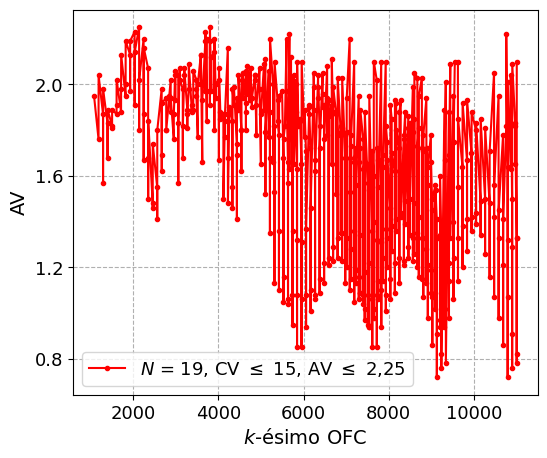

In [62]:
# Filtrar pontos onde 'E' é menor que CV e plotá-los
low_e_points = subset[subset['E'] <= CV]
print('Numero de dados low_e_points',len(low_e_points))
AV = low_e_points ['F']

# Calcular o valor mínimo de cada coluna
min_va = AV.min()
max_va = AV.max()
print('AV max =', max_va)
print('AV min =', min_va)


plt.rcParams.update({'font.size': h_let})
fig, ax = plt.subplots(figsize=(6,5))
fnt_lab = 14 ; fnt_tik_leg = 13
# Plotando os dados
ax.plot(AV,'r.-', label='$N$ = 19, CV $\leq$ 15, AV $\leq$ 2,25')
# Configurando os limites dos eixos
#ax.set_xlim(-10, 165400)  # Limites para o eixo x
#ax.set_ylim(0, 2.1) # Limites para o eixo y --------------------------------------------
ax.set_xlabel('$k$-ésimo OFC', fontsize=fnt_lab)
ax.set_ylabel("AV", fontsize=fnt_lab)
ax.tick_params(axis='both', labelsize=fnt_tik_leg)
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))  # Ajusta para ter no máximo 5 ticks no eixo X
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Ajusta para ter no máximo 5 ticks no eixo Y
ax.legend(loc='lower left', fontsize=fnt_tik_leg) # Exibindo a legenda
ax.grid(True, linestyle='--')
plt.show() # Mostrando o gráfico